In [ ]:
from keras.datasets import mnist

(X_train,Y_train),(x_test,y_test) = mnist.load_data()

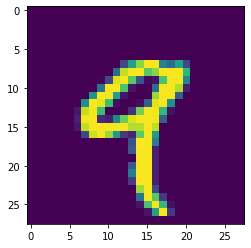

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[4])

In [ ]:
X_train[4].shape

(28, 28)

In [ ]:
"""
we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. 
The first number is the number of images (60,000 for X_train and 10,000 for X_test).
Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.
"""

#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
"""
We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. 
For example, we saw that the first image in the dataset is a 5. 
This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0
"""

from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn import preprocessing

# Define the One-hot Encoder
ohe = preprocessing.OneHotEncoder()

# Reshape data
Y_train = Y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Fit and transform training data
Y_train = ohe.fit_transform(Y_train).toarray()

# Fit and transform testing data
y_test = ohe.fit_transform(y_test).toarray()

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# Now build the Convalutional Layer
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
# First Convalutional Layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

# Second Convalutional Layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))

# Third Convalutional Layer
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))

# Flatten the results to feed into a DNN
model.add(Flatten())

model.add(Dense(10, activation='sigmoid'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model

model.fit(X_train, Y_train, validation_data=(x_test,y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 75s 40ms/step - loss: 0.6449 - accuracy: 0.8076 - val_loss: 0.1632 - val_accuracy: 0.9530
Epoch 2/4
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1380 - accuracy: 0.9593 - val_loss: 0.1224 - val_accuracy: 0.9622
Epoch 3/4
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1025 - accuracy: 0.9684 - val_loss: 0.0869 - val_accuracy: 0.9751
Epoch 4/4
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0844 - accuracy: 0.9741 - val_loss: 0.0846 - val_accuracy: 0.9761


In [ ]:
prediction = model.predict(x_test)
prediction

array([[0.2270841 , 0.9430349 , 0.99547875, ..., 0.9999373 , 0.88495636,
        0.90226436],
       [0.99976814, 0.9999372 , 1.        , ..., 0.9999044 , 0.98114204,
        0.98875856],
       [0.7591865 , 0.9999901 , 0.97215   , ..., 0.85347056, 0.99287903,
        0.8269868 ],
       ...,
       [0.9983168 , 0.06418425, 0.9063746 , ..., 0.58615303, 0.99988866,
        0.9999186 ],
       [0.9949217 , 0.00520152, 0.76821136, ..., 0.04077956, 0.99861807,
        0.94320095],
       [0.9999958 , 0.98944247, 0.9999945 , ..., 0.6824658 , 0.9999997 ,
        0.99990994]], dtype=float32)

In [ ]:
prediction[:1]

array([[2.2708410e-01, 9.4303489e-01, 9.9547875e-01, 9.9413979e-01,
        7.9131746e-01, 6.5714002e-02, 4.5242906e-04, 9.9993730e-01,
        8.8495636e-01, 9.0226436e-01]], dtype=float32)

In [ ]:
np.where(prediction[:1]==prediction[:1].max())

(array([0]), array([7]))

In [ ]:
test = x_test[0].reshape(28,28)

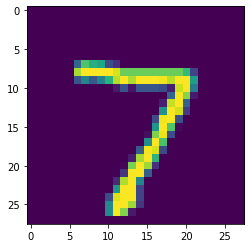

In [ ]:
plt.imshow(test)